In [59]:
from pprint import pprint
from sympy import *
from numpy import diag, diagflat, dot
import numpy as np

beta = 2
alfa = beta*10**(-6)
L = 16
deltaX = (L/(L-1))
print("DeltaX: ", deltaX)
deltaT = (deltaX**2)/(2*alfa)
print("DeltaT: ", deltaT)
Ci = 1/1000
Ce = 1.2
nos_internos = L-2

def espaço_interno(nos_interior):
    return L / (nos_interior+1)
    
def constante_pvc_dp(alfa, deltaT, deltaX):
    return 1+((2*alfa*deltaT)/(deltaX**2))

def constante_pvc_dp_ut(alfa, deltaT, deltaX):
    return 1+((alfa*deltaT)/(deltaX**2))

def constante_pvc_vizinhos(alfa, deltaT, deltaX):
    return -((alfa*deltaT)/(deltaX**2))


def gauss_jacobi(matriz_A, matriz_x, matriz_b):

    matriz_D = diag(matriz_A)
    matriz_R = matriz_A - diagflat(matriz_D)

    for i in range(50):
        matriz_x = (matriz_b - dot(matriz_R, matriz_x)) / matriz_D
    return matriz_x


def sistema_pvc(nos_interior, alfa, deltaT, deltaX):

    linha_A = [0] * nos_interior
    matriz_A = [linha_A] * nos_interior
    matriz_b = []
    matriz_x = []
    a = round(constante_pvc_vizinhos(alfa, deltaT, deltaX), 2)
    b = 0

    for l in range(nos_interior):
        linha = []

        for c in range(nos_interior):
            if l == nos_interior-1 & c == nos_interior-1:
                linha.append(constante_pvc_dp_ut(alfa, deltaT, deltaX))
            elif c == l:
                linha.append(constante_pvc_dp(alfa, deltaT, deltaX))
            elif (c == l - 1) | (c - 1 == l):
                linha.append(a)
            else:
                linha.append(b)

        matriz_A[l] = linha

    print("\nMatriz A:")
    print(np.matrix(matriz_A))

    for l in range(nos_interior):
        if l == 0:
            matriz_b.append(round(((alfa*deltaT)/(deltaX**2))*Ce, 2))
        else:
            matriz_b.append(0)

    print("\nMatriz b:")
    print(matriz_b)

    for l in range(nos_interior):
        matriz_x.append(1)

    print("\nMatriz x:")
    print(matriz_x)

    matriz_solucao = gauss_jacobi(matriz_A, matriz_x, matriz_b)
    print("\nMatriz solucao:")

    i = 2
    j = 0
    while i <= nos_interior + 1:
        print("C{} = {}".format(i, matriz_solucao[j]))
        i += 1
        j += 1

    vetor_solucao = []
    vetor_solucao.append(Ce)
    for i in range(nos_interior):
        vetor_solucao.append(matriz_solucao[i])
    vetor_solucao.append(matriz_solucao[nos_interior-1])

    return vetor_solucao


resultadoPVC = sistema_pvc(nos_internos, alfa, deltaT, deltaX)

DeltaX:  1.0666666666666667
DeltaT:  284444.44444444444

Matriz A:
[[ 2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

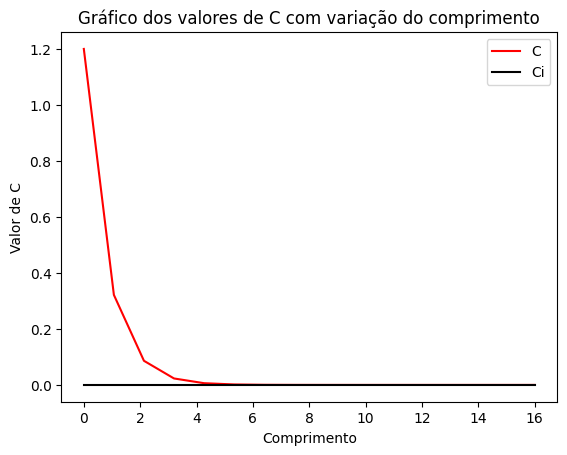

In [60]:
import matplotlib.pyplot as plt

vetor_comprimento = [0]
vetor_Ci = [Ci]
z = 0

while z <= nos_internos:
    vetor_comprimento.append(vetor_comprimento[z] + (espaço_interno(nos_internos)))
    vetor_Ci.append(Ci)
    z += 1


def grafico_PVC():

    plt.title("Gráfico dos valores de C com variação do comprimento")
    plt.plot(vetor_comprimento, resultadoPVC, color="red", label="C")
    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")
    plt.legend()
    plt.xlabel("Comprimento")
    plt.ylabel("Valor de C")
    plt.show()


grafico_PVC()

vetor vetor deltaT: [284444.44444444444, 568888.8888888889, 1137777.7777777778, 2275555.5555555555, 4551111.111111111]

Resultados para nos internos = 284444.44444444444

Matriz A:
[[ 2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0. 

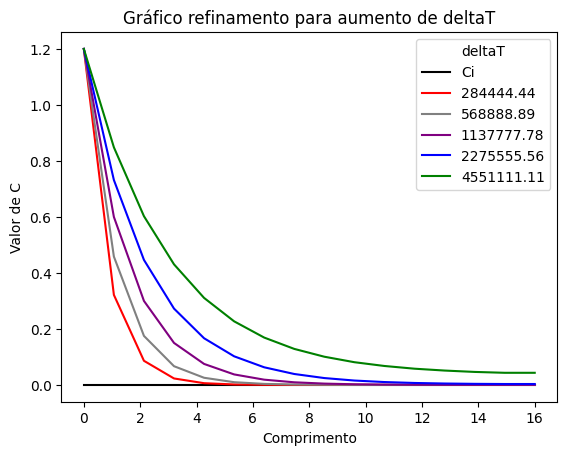

In [61]:
def refinamento():
    vetor_deltaT = [deltaT]

    for i in range(0, 4):
        vetor_deltaT.append(vetor_deltaT[i]*2)

    print("vetor vetor deltaT:", vetor_deltaT)
    
    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")

    for i in range(0, 5):
        cor = ["red", "grey", "purple", "blue", "green"]
        print("\nResultados para nos internos = {}".format(vetor_deltaT[i]))
        resultados_PVC = sistema_pvc(nos_internos, alfa, vetor_deltaT[i], deltaX)
        plt.plot(
            vetor_comprimento, resultados_PVC, color=cor[i], label=round(vetor_deltaT[i], 2)
        )
        plt.legend(title="deltaT")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")

    plt.title("Gráfico refinamento para aumento de deltaT")
    plt.show()


refinamento()



Resultados para alpha = [2e-06, 1.9999999999999998e-05, 0.00019999999999999998, 0.002, 0.02]

Matriz A:
[[ 2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0

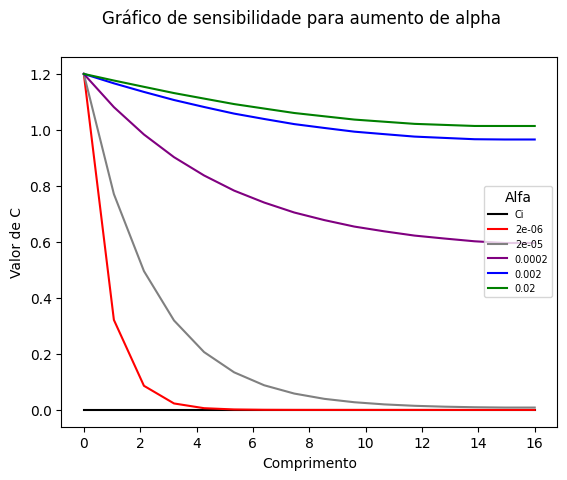

In [62]:
def sensibilidade():

    vetor_alfa = [alfa]

    for i in range(0, 4):
        vetor_alfa.append(vetor_alfa[i] * 10)

    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")

    for i in range(0, 5):

        cor = ["red", "grey", "purple", "blue", "green"]
        print(
            "\nResultados para alpha = {}".format(
                vetor_alfa
            )
        )
        resultado_PVC_alpha = sistema_pvc(nos_internos, vetor_alfa[i], deltaT, deltaX)

        plt.plot(
            vetor_comprimento,
            resultado_PVC_alpha,
            color=cor[i],
            label=round(vetor_alfa[i], 6),
        )
        plt.legend(title="Alfa", fontsize=7)
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")


    plt.suptitle("Gráfico de sensibilidade para aumento de alpha")
    plt.show()


sensibilidade()